<a href="https://colab.research.google.com/github/FerCipriani/Primeros/blob/main/IVE_Dip_T09_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import pandas as pd
import numpy as np

In [197]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/IVE_Dip02.csv", delimiter=';')
data.head(5) # Miramos las primeras filas

,Ord,ETQ,T0,T1,T2,T3,T4
0,19,AFI,0.001068,0.352252,0.001813,0.000835,0.644031
1,52,AFI,0.001044,0.306561,0.001772,0.000816,0.689807
2,9,AFI,0.000893,0.368488,0.014413,0.000698,0.615508
3,21,AFI,0.007318,0.589085,0.017581,0.000696,0.385320
4,70,AFI,0.000701,0.241130,0.008782,0.005610,0.743778


In [198]:
data.columns.values

array(['Ord', 'ETQ', 'T0', 'T1', 'T2', 'T3', 'T4'], dtype=object)

In [199]:
data=data.drop(['Ord'], axis=1)
data.head(2)

,ETQ,T0,T1,T2,T3,T4
0,AFI,0.001068,0.352252,0.001813,0.000835,0.644031
1,AFI,0.001044,0.306561,0.001772,0.000816,0.689807


In [200]:
data.value_counts("ETQ")

ETQ
AFI    90
NEG    71
ABS     3
dtype: int64

In [201]:
data.shape

(164, 6)

In [202]:
data = data[data.ETQ != "ABS"]

In [203]:
data.value_counts("ETQ")

ETQ
AFI    90
NEG    71
dtype: int64

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

Modelos

In [205]:
#librerias
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
Data=data.drop(['ETQ'], axis=1) # Data son las etiquetas
Target=data.drop(['T0','T1', 'T2','T3','T4'], axis=1) #Target son las variables

In [208]:
from sklearn.preprocessing import StandardScaler 

In [209]:
Scl = StandardScaler ()
DataST = Scl.fit_transform(Data)

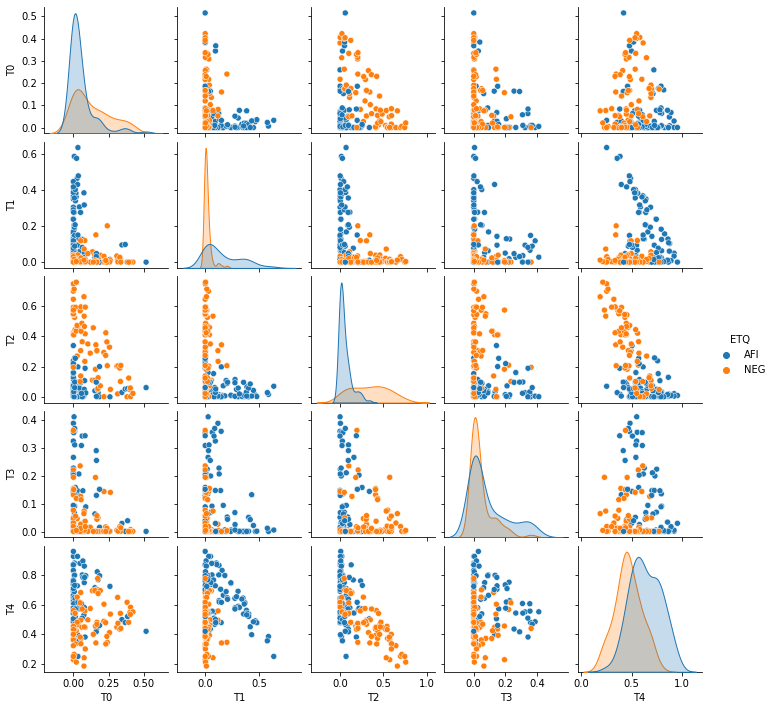

In [98]:
sns.pairplot(data, hue='ETQ', height=2) #Plot de a pares

In [210]:
X_train, X_test, y_train, y_test = train_test_split(DataST, Target, test_size=.40, random_state = 0) 

# 01 Arbol

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
ModelTree = DecisionTreeClassifier(criterion='entropy', 
                                      splitter='best',
                                      max_depth=None,
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, 
                                      max_features=None, 
                                      random_state=None, 
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0, 
                                      min_impurity_split=None, 
                                      class_weight=None, 
                                      ccp_alpha=0.0,
                                      ).fit(X_train, y_train)

In [102]:
Imp=ModelTree.feature_importances_
print(Data.columns)
print(Imp) # Parece que Sepal.Length es nulo. Una vez que termine todo rehacemos sin esta variable

Index(['T0', 'T1', 'T2', 'T3', 'T4'], dtype='object')
[0.05355189 0.38111122 0.13405845 0.15483298 0.27644545]


    Modelado: 100.000


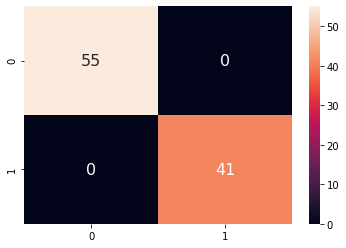

    Test    : 87.692


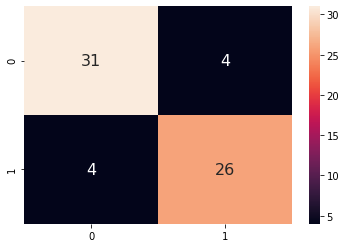

In [105]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [106]:
print(classification_report(y_test, ModelTree.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.89      0.89      0.89        35
         NEG       0.87      0.87      0.87        30

    accuracy                           0.88        65
   macro avg       0.88      0.88      0.88        65
weighted avg       0.88      0.88      0.88        65



In [107]:
param = {'criterion':['gini','entropy'], 
         #'max_features': ['auto', 'sqrt', 'log2'],
         'ccp_alpha': [0.1, .01, .001, 0], 
         #'max_depth' : [5, 6, 7, 8, 9 ,10 ,11 ,12 ,15 ,20 ,30 ,40 ,50 ,70 ,90 ,120 ,150],
         'min_samples_leaf':np.arange(2,10)}
        

In [108]:
ModelTree1 = GridSearchCV(DecisionTreeClassifier(), param).fit(X_train, y_train)
print(ModelTree1.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.1, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


    Modelado: 93.750


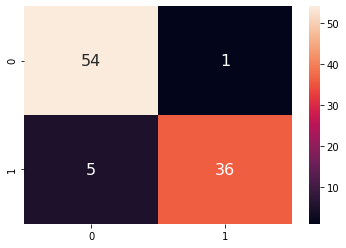

    Test    : 83.077


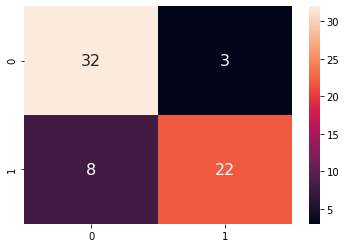

In [109]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [110]:
print(classification_report(y_test, ModelTree1.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.80      0.91      0.85        35
         NEG       0.88      0.73      0.80        30

    accuracy                           0.83        65
   macro avg       0.84      0.82      0.83        65
weighted avg       0.84      0.83      0.83        65



In [111]:
import graphviz 
from sklearn import tree

In [112]:
ModelTree1=DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_train, y_train)

In [113]:
dot_data = tree.export_graphviz( ModelTree1, 
                                out_file=None,  
                                feature_names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],  
                                filled=True,  
                                node_ids=True, 
                                proportion=True, 
                                rounded=True,) 
graph = graphviz.Source(dot_data) 
graph

ValueError: ignored

 # 02 Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
RFm = RandomForestClassifier(n_estimators=500, class_weight="balanced",
                               max_features = 'sqrt', verbose=0, max_depth=6,
                               oob_score=True, random_state=50).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


    Modelado: 100.000


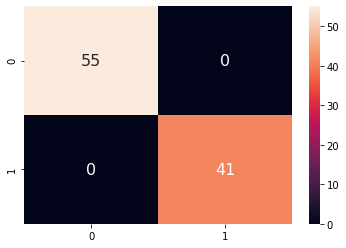

    Test    : 90.769


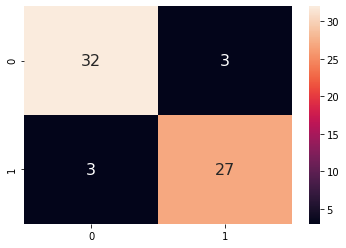

In [116]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [117]:
print(classification_report(y_test, RFm.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.91      0.91      0.91        35
         NEG       0.90      0.90      0.90        30

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65



In [118]:
param_RFm = {'bootstrap': [True, False],
 'max_depth': [15, 20, 25],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [500]} #, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} #Pongo esto en 500 por una cuestion de tiempo

In [119]:
RFm1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RFm, cv= 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [120]:
RFm1.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [121]:
RFm1=RandomForestClassifier(max_depth= 15, 
                            bootstrap=False,
                            class_weight="balanced",
                            max_features= 'sqrt',
                            min_samples_leaf= 2, 
                            min_samples_split= 15, 
                            n_estimators= 500).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


    Modelado: 97.917


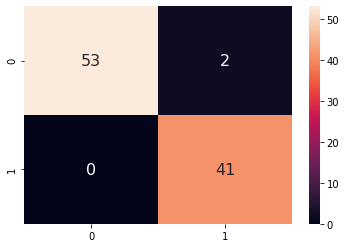

    Test    : 89.231


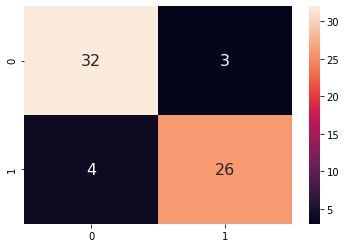

In [122]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [123]:
print(classification_report(y_test, RFm1.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.89      0.91      0.90        35
         NEG       0.90      0.87      0.88        30

    accuracy                           0.89        65
   macro avg       0.89      0.89      0.89        65
weighted avg       0.89      0.89      0.89        65



 # 03 KNN Vecinos

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


    Modelado: 96.875


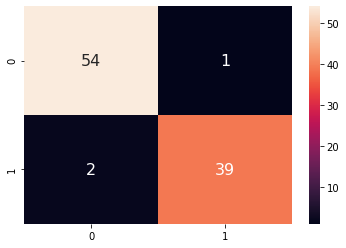

    Test    : 87.692


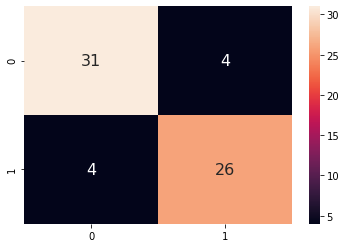

In [126]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(knn.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(knn.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [127]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.89      0.89      0.89        35
         NEG       0.87      0.87      0.87        30

    accuracy                           0.88        65
   macro avg       0.88      0.88      0.88        65
weighted avg       0.88      0.88      0.88        65



In [128]:
param_Knn = {
'n_neighbors': [2, 3, 5, 11, 19],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan'],
}

In [129]:
cmK1 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_Knn, cv= 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [130]:
cmK1.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
#knn1 = KNeighborsClassifier(n_neighbors = 2, metric= 'euclidean', weights= 'distance').fit(X_train, y_train)

    Modelado: 95.833


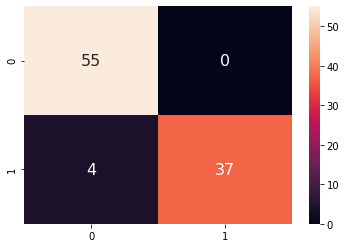

    Test    : 84.615


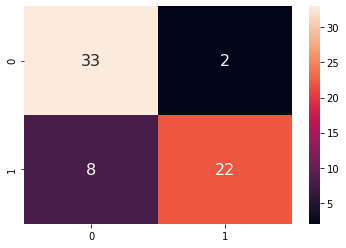

In [131]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, cmK1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, cmK1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [132]:
print(classification_report(y_test, cmK1.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.80      0.94      0.87        35
         NEG       0.92      0.73      0.81        30

    accuracy                           0.85        65
   macro avg       0.86      0.84      0.84        65
weighted avg       0.86      0.85      0.84        65



 # 04 Naive Bayes classifier

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
gnb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 88.542


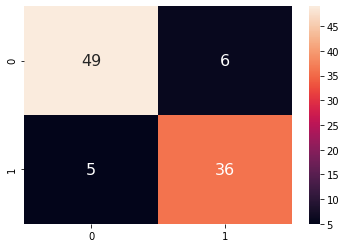

    Test    : 84.615


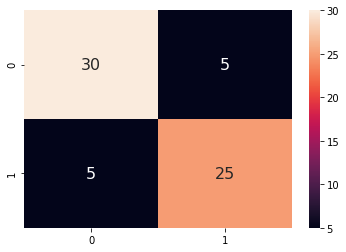

In [135]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [136]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.86      0.86      0.86        35
         NEG       0.83      0.83      0.83        30

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.85      0.85      0.85        65



In [137]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [138]:
gnb1 = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 verbose=0, 
                 scoring='accuracy',).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [139]:
gnb1.best_params_

{'var_smoothing': 1.0}

    Modelado: 89.583


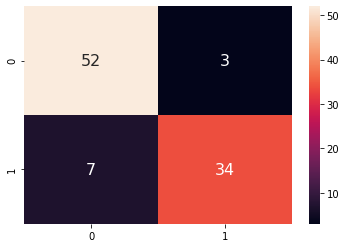

    Test    : 86.154


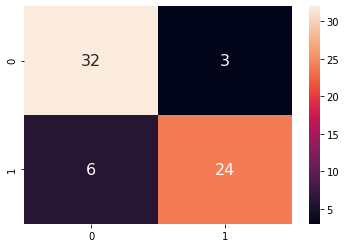

In [140]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [141]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.86      0.86      0.86        35
         NEG       0.83      0.83      0.83        30

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.85      0.85      0.85        65



 # 05 Boosting and AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 100.000


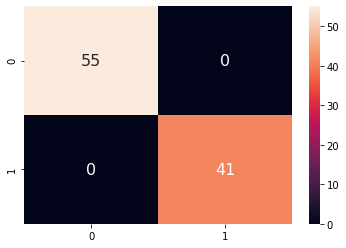

    Test    : 86.154


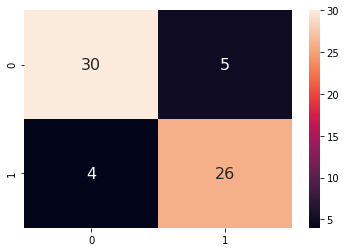

In [144]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [145]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.88      0.86      0.87        35
         NEG       0.84      0.87      0.85        30

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65



In [146]:
param_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [147]:
clf1 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), parameters, verbose=0,).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

    Modelado: 100.000


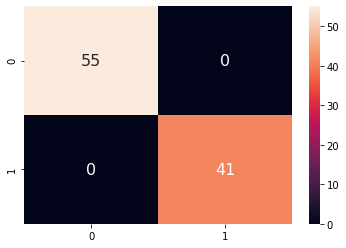

    Test    : 90.769


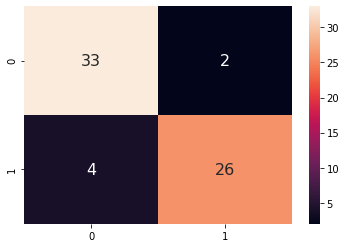

In [148]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [149]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.89      0.94      0.92        35
         NEG       0.93      0.87      0.90        30

    accuracy                           0.91        65
   macro avg       0.91      0.90      0.91        65
weighted avg       0.91      0.91      0.91        65



 # 06 LDA Linear Discriminant Analysis
 https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [151]:
lda = LinearDiscriminantAnalysis(n_components = 2).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


    Modelado: 89.583


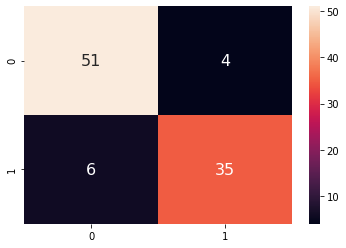

    Test    : 86.154


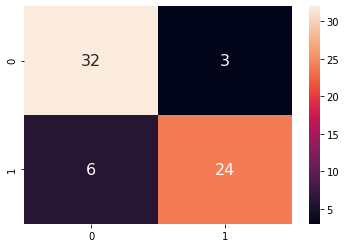

In [152]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(lda.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, lda.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(lda.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, lda.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [153]:
print(classification_report(y_test, lda.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.84      0.91      0.88        35
         NEG       0.89      0.80      0.84        30

    accuracy                           0.86        65
   macro avg       0.87      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65



 # 07 MLPClassifier

In [154]:
from sklearn.neural_network import MLPClassifier

In [155]:
Mlpc = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(150,100,50), 
                    max_iter=300,activation = 'relu', 
                    solver='adam').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 100.000


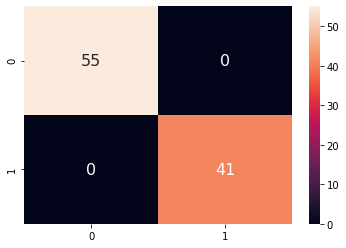

    Test    : 87.692


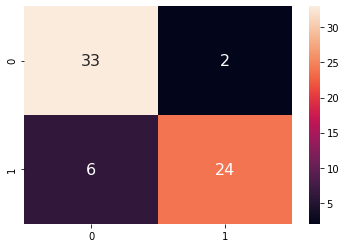

In [156]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [157]:
print(classification_report(y_test, Mlpc.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.85      0.94      0.89        35
         NEG       0.92      0.80      0.86        30

    accuracy                           0.88        65
   macro avg       0.88      0.87      0.87        65
weighted avg       0.88      0.88      0.88        65



In [158]:
GridMlpc1={'activation': ['tanh', 'relu'],
 'alpha': [0.001, 0.05],
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['sgd', 'adam']}

In [159]:
Mlpc1 = GridSearchCV(MLPClassifier(), GridMlpc1, n_jobs=-1, cv=3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [160]:
Mlpc1.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

    Modelado: 89.583


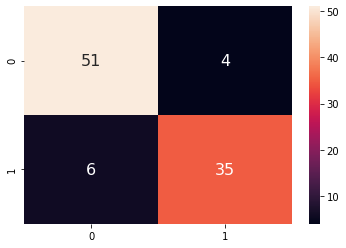

    Test    : 87.692


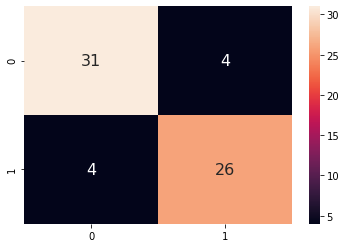

In [161]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [162]:
print(classification_report(y_test, Mlpc1.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.89      0.89      0.89        35
         NEG       0.87      0.87      0.87        30

    accuracy                           0.88        65
   macro avg       0.88      0.88      0.88        65
weighted avg       0.88      0.88      0.88        65



In [163]:
Mlpc1.best_score_

0.8958333333333334

# 08 Support Vector Machine

In [211]:
from sklearn.svm import SVC

In [212]:
mSVC = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True).fit(X_train, y_train)

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Train score of trained model: 100.000


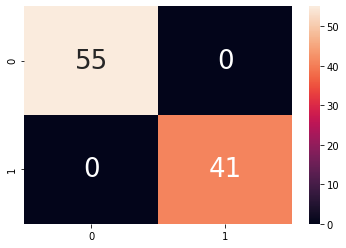

    Test score of trained model:  75.385


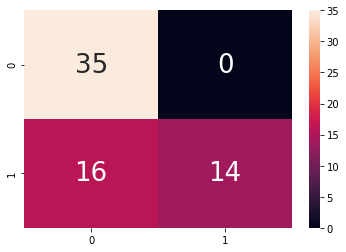

In [213]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [214]:
print(classification_report(y_test, mSVC.predict(X_test)))

              precision    recall  f1-score   support

         AFI       0.69      1.00      0.81        35
         NEG       1.00      0.47      0.64        30

    accuracy                           0.75        65
   macro avg       0.84      0.73      0.73        65
weighted avg       0.83      0.75      0.73        65



In [215]:
#param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'shrinking': [True, False],
              'degree': [1,2,3],
              'probability': [True, False],
              'verbose': [True, False],}

In [217]:
param = {'C': [0.1, 1, 10, 100], 
              'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'degree': [1,2,3],
              'probability': [True, False],}

In [218]:
mSVC1 = GridSearchCV(mSVC, param, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.3s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [219]:
print(f'GridSearchView Best Estimator: {mSVC1.best_estimator_}')

GridSearchView Best Estimator: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)


    Train score of trained model: 94.792


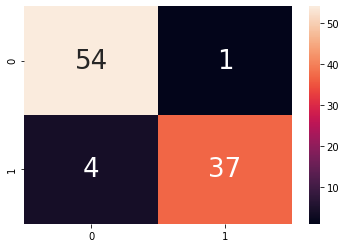

    Test score of trained model:  87.692


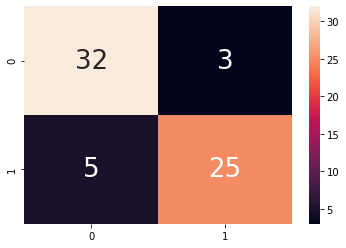

In [220]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC1.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC1.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC1.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC1.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [ ]:
print(classification_report(y_test, mSVC1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.50      0.83      0.62         6
          SI       0.91      0.67      0.77        15

    accuracy                           0.71        21
   macro avg       0.70      0.75      0.70        21
weighted avg       0.79      0.71      0.73        21



In [ ]:
print(f'GridSearchView Best Score: {mSVC1.best_score_*100}')

GridSearchView Best Score: 87.14285714285715


 # 09 Keras

In [172]:
from tensorflow.keras.utils import to_categorical

In [173]:
from sklearn.preprocessing import LabelEncoder

In [175]:
TargetEnc = LabelEncoder().fit_transform(Target) # transformo las categorías a Nros

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
TargetEnc1 = pd.get_dummies(TargetEnc).values

In [ ]:
TargetEnc1

In [ ]:
DataST.reshape(-1,1)

In [179]:
X_train,X_test, y_train,y_test = train_test_split(DataST, TargetEnc1, test_size=0.25, random_state=0) 

In [180]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [184]:
model = Sequential()
model.add(Dense(10,input_shape=(5,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(2,activation='softmax'))

In [185]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 238
Trainable params: 238
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [186]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [187]:
y_pred = model.predict(X_test)

In [189]:
y_test_class = np.argmax(y_test,axis=1) # paso de tres columnas a una columna para poder comparar
y_pred_class = np.argmax(y_pred,axis=1) # y_pred me da una matriz de probabilidades, con argmax hago 1 el mayor

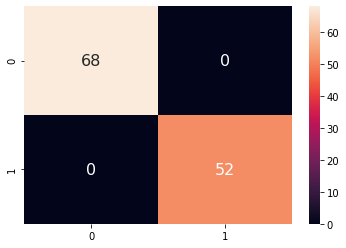

In [190]:
sns.heatmap(confusion_matrix(np.argmax(y_train,axis=1),  np.argmax(model.predict(X_train),axis=1)), annot=True, annot_kws={"size": 16})
plt.show()

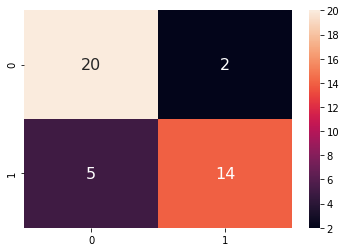

In [191]:
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, annot_kws={"size": 16})
plt.show()

In [192]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.88      0.74      0.80        19

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.83        41
weighted avg       0.83      0.83      0.83        41



 # Extra: PCA

In [193]:
from sklearn.decomposition import PCA

In [194]:
DataST = Scl.fit_transform(Data)
pca = PCA(n_components=5)
X_new = pca.fit_transform(DataST)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.55909238e-01, 2.54586069e-01, 2.34347384e-01, 1.55157309e-01,
       2.99015006e-31])